In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [6]:
#generate some random data
np.random.seed(0)
X=2.5*np.random.randn(100)+1.5
res=0.5*np.random.randn(100)
y=2+0.3*X+res

In [18]:
#create pandas dataframe to store the value of X and y values
df=pd.DataFrame({'x':X,
                "y":y})

In [19]:
#show first five line of dataframe
df.head()

,x,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


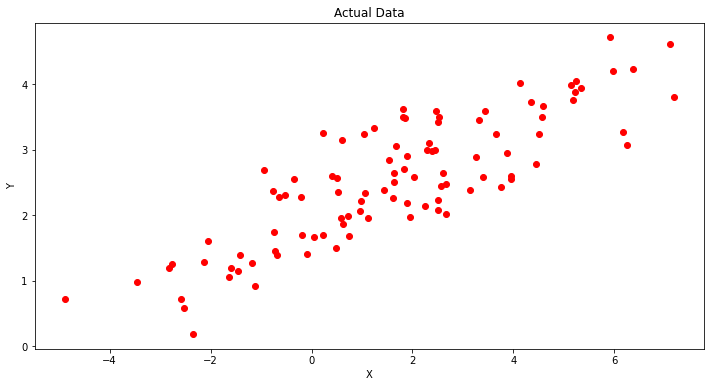

In [20]:
#plot regression against the actual data
plt.figure(figsize=(12,6))
plt.plot(X,y,'ro')# scatter plot of the actual data
plt.title("Actual Data")
plt.xlabel("X")
plt.ylabel('Y')
plt.show()

To estimate y using the OLS method, we need to calculate xmean and ymean, the covariance of X and y (xycov), and the variance of X (xvar) before we can determine the values for alpha and beta.

In [28]:
#calculate the mean of X and y
xmean=np.mean(X)
ymean=np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['x'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['x'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')


alpha = 2.0031670124623426
beta = 0.3229396867092763


Great, we now have an estimate for alpha and beta! Our model can be written as Yₑ = 2.003 + 0.323*X, and we can make predictions:



In [29]:
ypred = alpha + beta * X


In [30]:
ypred

array([3.91178282, 2.81064315, 3.27775989, 4.29675991, 3.99534802,
       1.69857201, 3.25462968, 2.36537842, 2.40424288, 2.81907292,
       2.60387001, 3.66168312, 3.10199975, 2.58581077, 2.84592918,
       2.75696825, 3.69382011, 2.32194218, 2.74033151, 1.79802302,
       0.42642221, 3.015275  , 3.18547843, 1.88839019, 4.32006116,
       1.31339555, 2.52451965, 2.33645381, 3.72506464, 3.67386219,
       2.61267323, 2.79288576, 1.77082341, 0.88838207, 2.20668994,
       2.61380476, 3.48085076, 3.45831697, 2.17486854, 2.24351265,
       1.64102813, 1.34112617, 1.11002064, 4.06253353, 2.07610925,
       2.1338976 , 1.47613319, 3.11528277, 1.18459738, 2.31582084,
       1.76462232, 2.79994197, 2.07517841, 1.53439407, 2.46482364,
       2.83338994, 2.54127917, 2.73177699, 1.9754571 , 2.19471775,
       1.94466613, 2.19729158, 1.83108353, 1.09386364, 2.6308214 ,
       2.16319902, 1.17143718, 2.86120343, 1.75506992, 2.52951462,
       3.07620724, 2.59171079, 3.40747079, 1.49064088, 2.81240

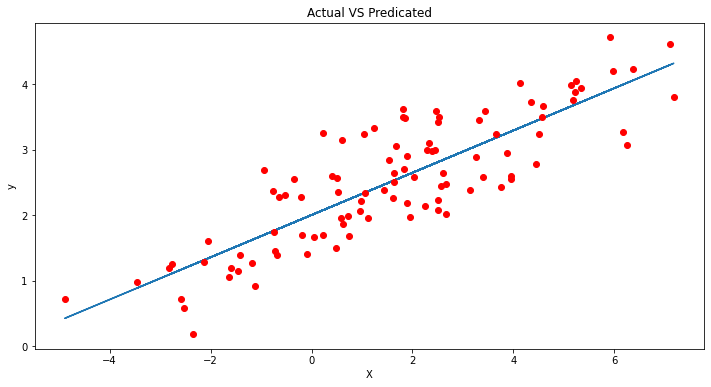

In [31]:
#plot regression against the actual data
plt.figure(figsize=(12,6))
plt.plot(X,ypred) #regression line
plt.plot(X,y,'ro')# scatter plot showing actual data
plt.title("Actual VS Predicated")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

The blue line is our line of best fit, Yₑ = 2.003 + 0.323 X. We can see from this graph that there is a positive linear relationship between X and y. Using our model, we can predict y from any values of X!

For example, if we had a value X = 10, we can predict that:

Yₑ = 2.003 + 0.323 (10) = 5.233.

# Linear Regression with scikit-learn

In [32]:
from sklearn.linear_model import LinearRegression


In [33]:
df

,x,y,xycov,xvar
0,5.910131,4.714615,9.282815,18.152805
1,2.500393,2.076238,-0.391082,0.723985
2,3.946845,2.548811,0.029747,5.277702
3,7.102233,4.615368,11.338948,29.732079
4,6.168895,3.264107,3.291209,20.424750
...,...,...,...,...
95,3.266433,2.894157,0.579331,2.614407
96,1.526250,2.843770,-0.037956,0.015195
97,5.964676,4.201155,7.185997,18.620573
98,1.817280,3.626802,0.183016,0.028143


In [35]:
x=df[['x']].values
y=df[['y']].values

In [38]:
model=LinearRegression()

In [39]:
model.fit(x,y)

LinearRegression()

In [40]:
print('Alpha:{}'.format(model.intercept_))
print("Betas:{}".format(model.coef_))

Alpha:[2.00316701]
Betas:[[0.32293969]]


In [41]:
y_pred=model.predict(x)

Text(0.5, 1.0, 'Actual VS Predicated')

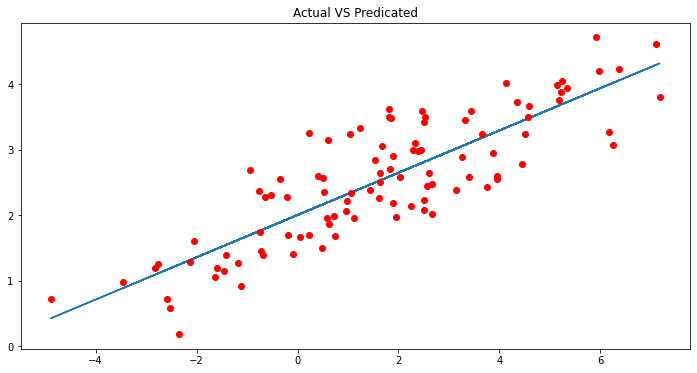

In [43]:
#plot regression against the actual data
plt.figure(figsize=(12,6))
plt.plot(x,ypred)
plt.plot(x,y,'ro')
plt.title("Actual VS Predicated")

# Multivariate Regression

In [44]:
advert = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',
                     usecols=['TV', 'Radio', 'Newspaper', 'Sales'])

In [45]:
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [49]:
x=advert[['TV','Radio','Newspaper']]
y=advert['Sales']

In [52]:
#show the values of x
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [54]:
#show the value of the y
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [55]:
#initilaize and fit the model
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [56]:
print('Alpha:{}'.format(model.intercept_))
print('Betas:{}'.format(model.coef_))


Alpha:2.9388893694594067
Betas:[ 0.04576465  0.18853002 -0.00103749]


Therefore, our model can be written as:

Sales = 2.938 + 0.188TV + 0.1880Newspaper -0.001*Radio.

In [57]:
model.predict(x)

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [59]:
new_X=[[200,31,30]]
print(model.predict(new_X))

[17.90512419]


C:\Users\Sanwal Khan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
new_X=[[0,0,0]]
print(model.predict(new_X))

[2.93888937]


C:\Users\Sanwal Khan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
